# Strange on-off lines in Virgo data

Refer to:
https://logbook.virgo-gw.eu/virgo/?r=43071

## Explanation
The lines we see in the **LSC_DARM** spectrogram are likely to be produced by two "beating" _square waves_ with frequencies very close to each another.

$$s_1(t)=\mathrm{sign}\big(\sin(2\pi f_0 t)\big)\qquad\text{and}\qquad{}s_2(t)=\mathrm{sign}\big(\sin(2\pi f_1 t)\big)$$

where $f_0=\frac{1000\ \mathrm{Hz}}{36}\simeq 27.78\ \mathrm{Hz}$ and $|f_1 -f_0| \simeq{} 6.4\times 10^{-5}\ \mathrm{Hz}$. The Fourier expansion of these square waves is made by all the odd harmonics:

$$s_1(t) = \frac{4}{\pi}\sum_{k=1} ^{+\infty} \frac{\sin\big(2\pi(2k-1)f_0 t\big)}{2k-1} = \frac{4}{\pi}\left( \sin(2\pi f_0 t)+\frac{1}{3}\sin(2\pi\, 3f_0 t)+\frac{1}{5}\sin(2\pi\, 5f_0 t)+\frac{1}{7}\sin(2\pi\, 7f_0 t)+\ldots\right)$$

Multiplying the previous expansion of $s_1(t)$ for the corresponding one for $s_2(t)$, and assuming $|f_0-f_1|$ "negligible", we would obtain lines of various amplitudes,

\begin{align}
s_1(t)\cdot s_2(t)\simeq &\ c_0 + c_1 \cos (2\pi\,2f_0\, t) +c_2 \cos(2\pi\,4f_0\,t) +c_3 
    \cos(2\pi\,6f_0 t) +c_4 \cos(2\pi\,8f_0\,t) + c_5 \cos(2\pi \,10 f_0\,t) \\
    &+ c_6 \cos(2\pi \,12 f_0\,t)+ c_7 \cos(2\pi \,14 f_0\,t)+ \ldots+\mathcal{O}(|f_0-f_1|)
\end{align}
   
at frequencies:
\begin{align}
f = 2f_0 &\simeq 55.56\ \mathrm{Hz}\\
 4f_0 &\simeq 111.1\ \mathrm{Hz}\\
 6f_0 &\simeq 166.7\ \mathrm{Hz}\\
 8f_0 &\simeq 222.2\ \mathrm{Hz}\\
 10f_0&\simeq 277.8\ \mathrm{Hz} \\
 12f_0&\simeq 333.3\ \mathrm{Hz} \\
 14f_0&\simeq 377.8\ \mathrm{Hz} \\
\ldots&\quad \ldots  
\end{align}

The value of the coefficients $c_i$ can be obtained from Mathematica in approximate form (even Mathematica can't sum infinite many terms!).

The previous result gives the spacing of the lines. For understanding the frequency of the beating  

#### Note
Notice that the beating effect can be produced by a bilinear coupling of the two waves or of their superposition. Through the _prostaferesis rules_:

\begin{align}
\sin(2\pi\,f_0)\cdot\sin(2\pi\,f_1 t)&= \frac{1}{2}\Big[\cos\big(2\pi(f_1-f_2)t\big)- \cos\big(2\pi(f_1+f_2)t\big)\Big]\\
&\equiv \frac{1}{2}\big(\cos\omega t - \cos \Omega t\big) 
\end{align}


where $\omega \equiv 2\pi (f_1-f_0)$ and $\Omega = 2\pi (f_0+f_1)$. With the previous values of $f_0$ and $f_1$ this implies that the beating effect can be obtained also from the _superposition_ of two square waves of frequencies:

$$\frac{\Omega}{2\pi} \simeq 55.5556\ \mathrm{Hz}\qquad\text{and}\qquad \frac{\omega}{2\pi} \simeq 6.4\times 10^{-5}\ \mathrm{Hz}$$

### Conclusion
Hence, in order to explain the on-off lines in the LSC_DARM spectrogram we have to find two signals with frequencies $f_0\simeq 27.78\ \mathrm{Hz}$ and $f_1\simeq f_0 + 6.4\times 10^{-5} \ \mathrm{Hz}$ that have a bilinar coupling, or two signals with frequecies $\frac{\Omega}{2\pi} \simeq 55.56\ \mathrm{Hz}$ and $\frac{\omega}{2\pi} \simeq 6.4\times 10^{-5}\ \mathrm{Hz}$ that sum their effects.

In the examples that follow, we have enhaced the effect of the beating increasing $\omega$ by two orders of magnitude: $\omega = 6.4\times10^{-3}\ \mathrm{Hz}$.

In [5]:
# Import generic modules
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.ndimage import gaussian_filter

#### Example (with much bigger frequency difference)

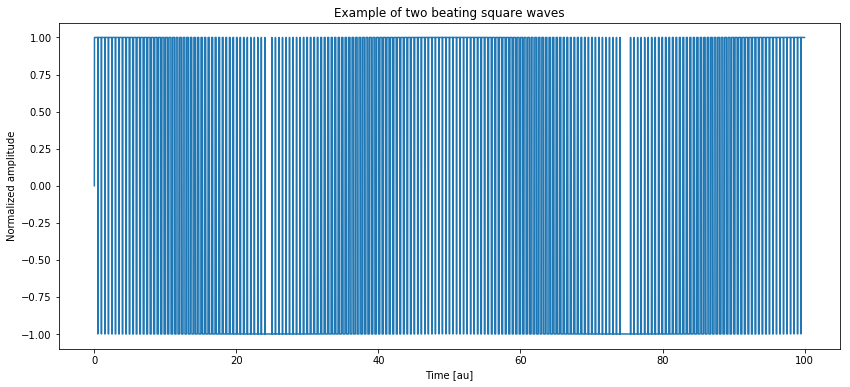

In [6]:
# Example
plt.figure(figsize = (14,6))
ti = np.arange(10000)/100
ex_f0 = 1
ex_f1 = 1.02
plt.plot(ti,np.sign(np.sin(2*np.pi*ex_f0*ti)) * np.sign(np.sin(2*np.pi*ex_f1*ti)))
plt.title('Example of two beating square waves')
plt.ylabel('Normalized amplitude')
plt.xlabel('Time [au]')
plt.show()

### Define some filters
For later convenience for two reasons:

1) The spectral content of a square wave contanins in principle all the harmonics, up to infinity. Howaver, aving a finite sempling frequency, this produces aliasing in the spectrogram. 

2) With a filter unction we can simulate a transfer function between the two beating square waves and the LSC_DARM. Indeed in the logbook entry we can see that these on-off lines are stronger at certain frequencies and weaker at others.

In [7]:
# Define band-pass filter
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# high-pass
def butter_highpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='high')
    return b, a

def butter_highpass_filter(data, lowcut, fs, order=5):
    b, a = butter_highpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# low-pass
def butter_lowpass(highcut, fs, order=5):
    nyq = 0.5 * fs
    high = highcut / nyq
    b, a = butter(order, high, btype='low')
    return b, a

def butter_lowpass_filter(data, highcut, fs, order=5):
    b, a = butter_lowpass(highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [66]:
fs = 4e3                        # sampling frequency
#f0 = 1e3/36; f1 = f0*(1+2.3e-4);  # lines
f0 = 55.55; f1 = 6.4e-3#55.555556
N = 1e6                         # number of data
amp = 1e-2 * np.sqrt(2)         # signal amplitude
noise_power = amp*2e-7 * fs / 2 # noise power
time = np.arange(N) / float(fs)


# Signal
sin1 = np.sin(2*np.pi*f0*time)
sin2 = np.sin(2*np.pi*f1*time)

cos1 = np.cos(2*np.pi*f0*time)
cos2 = np.cos(2*np.pi*f1*time)
# Window function: sigmoid or sign
def w_func(x):
    lam = 10
    #return np.arctan(lam*x)
    return np.sign(x) 

#sig = amp * (w_func(sin1) * w_func(sin2))
sig = amp * w_func(cos1 + cos2)

### Make some noise
# Withe noise
wn = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

# Red noise
rn = wn[1:]+wn[:-1]
rn = np.insert(rn,0,wn[0])

# Red wall
rw = np.random.normal(scale=np.sqrt(noise_power) * 20, size=time.shape) 
rw = butter_lowpass_filter(rw,20,fs,order = 2)

noise = wn*0.8 + rn*1e-1 + rw
#noise *= 1+np.exp(-time/500)
x = sig #+ noise

noise_on = True
if not noise_on:
    noise *= 0

    
# Filter to simulate a transfer function
no_filter = False

if not no_filter:
    # Filtered signal
    low_f  = 300
    high_f = 300
    order  = 3
    #x = butter_bandpass_filter(x,low_f,high_f,fs,order = order) + noise
    #x = butter_highpass_filter(x,low_f,fs,order = order) + noise
    x = butter_lowpass_filter(butter_highpass_filter(x,low_f,fs,order = 2), high_f, fs, order = 8 ) + noise
else:
    x = x + noise

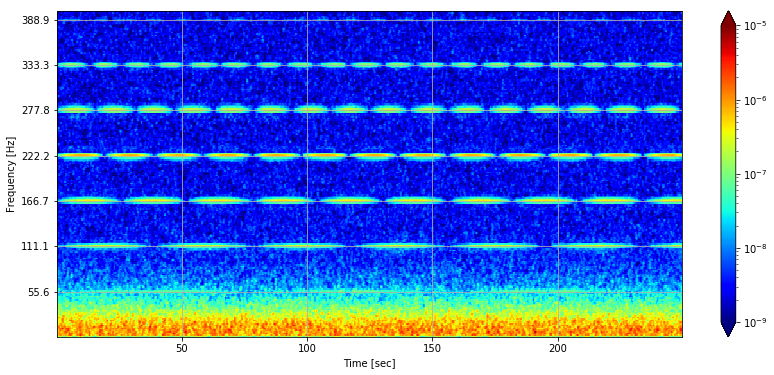

In [67]:
npseg = 2**11
t_res = npseg*2 / float(fs); 
f_res = fs/npseg
f, t, Sxx = signal.spectrogram(x, fs,nperseg = npseg,noverlap = npseg//2)

# Gaussian smothing
Sxx = gaussian_filter(Sxx,sigma=(.5,1))

# Plot figure
plt.figure(figsize = (14,6))
plt.pcolormesh(t, f, Sxx,norm=colors.LogNorm(vmin=1e-9, vmax=1e-5),cmap='jet')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(extend='both')

# add lines
lines = [[fr*1000/18]*2 for fr in range(1,8)]
plt.yticks(np.array(lines)[:,0])

plt.grid()
plt.ylim([0,400])
plt.savefig('spettro.png',dpi=200)
plt.show()

In [36]:
t_res, f_res

(1.024, 1.953125)

In [9]:
Sxx.min(), Sxx.max()

(6.178726853683497e-11, 5.768752633407617e-06)